In [24]:
import numpy as np
import pandas as pd

test_file = "/Users/richardbieringa/Projects/mesh-bench/results/01_http_max_throughput/http_baseline_MAX_0_1_2022-06-20T08:32:57Z.json"

In [25]:
s = pd.read_json(test_file, typ="series")

# Filter columns
required_cols = [
    "StartTime",
    "RequestedQPS",
    "RequestedDuration",
    "ActualQPS",
    "ActualDuration",
    "DurationHistogram",
]

s = s[required_cols]

# Extract nested columns in 'DurationHistogram'
for key, val in s["DurationHistogram"].items():
    s[key] = val
s = s.drop(["DurationHistogram", "Percentiles"])


s


StartTime                               2022-06-20T08:32:59.487539804Z
RequestedQPS                                                       max
RequestedDuration                                                15m0s
ActualQPS                                                    8746.6817
ActualDuration                                            900002111624
Count                                                          7872032
Min                                                           0.000047
Max                                                            0.16879
Sum                                                       28795.839311
Avg                                                           0.003658
StdDev                                                        0.003416
Data                 [{'Start': 4.7225e-05, 'End': 0.0001, 'Percent...
dtype: object

In [26]:
# fortio reports in seconds, convert to miliseconds
multiplier = 1000

s.loc[["Min", "Max", "Sum", "Avg"]] *= multiplier

# Construct Histogram Bins, Counts and Percentiles

data = s["Data"]

# Bins (default pd.cut function makes them as categoricals of intervals)
# https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html
# https://pandas.pydata.org/docs/reference/api/pandas.Interval.html

s["bins"]= pd.Categorical([pd.Interval(x["Start"] * multiplier , x["End"] * multiplier) for x in data])
s["counts"] = [x["Count"] for x in data]
s["percentages"] = [x["Percent"] for x in data]

s = s.drop("Data")
s

StartTime                               2022-06-20T08:32:59.487539804Z
RequestedQPS                                                       max
RequestedDuration                                                15m0s
ActualQPS                                                    8746.6817
ActualDuration                                            900002111624
Count                                                          7872032
Min                                                           0.047225
Max                                                          168.79017
Sum                                                    28795839.311071
Avg                                                           3.657993
StdDev                                                        0.003416
bins                 [(0.047225, 0.1], (0.1, 0.2], (0.2, 0.30000000...
counts               [25198, 92183, 97250, 100720, 104478, 110855, ...
percentages          [0.32009524351527, 1.491114365388758, 2.726500...
dtype:

Text(0.5, 0, 'Latency in ms')

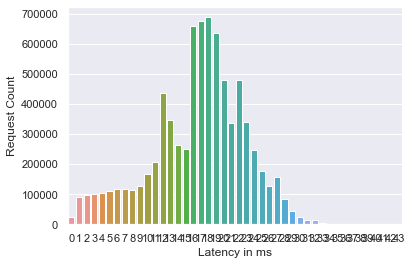

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme(style="darkgrid")


fig, ax = plt.subplots()
sns.barplot(data=s, x="bins", y="counts")


# ax.set_xticks(range(1, 11))
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())

ax.set_ylabel("Request Count")
ax.set_xlabel("Latency in ms")

